In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

In [3]:
df=pd.read_csv('./BreadBasket_DMS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [5]:
df.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

<AxesSubplot:>

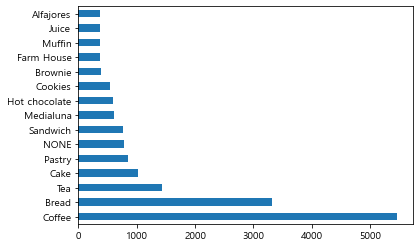

In [11]:
df['Item'].value_counts().head(15).plot(kind='barh')

In [12]:
df

,Date,Time,Transaction,Item
0,2016-10-30,9:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [16]:
df['Date']=pd.to_datetime(df['Date'])

In [18]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,9:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [26]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day_name()

In [29]:
df.sample(5)

,Date,Time,Transaction,Item,year,month,day
17881,2017-03-14,16:11:06,8154,Coffee,2017,3,Tuesday
14607,2017-02-18,12:10:27,6787,Alfajores,2017,2,Saturday
2696,2016-11-13,16:35:54,1266,Cake,2016,11,Sunday
18181,2017-03-17,13:53:11,8306,Bread,2017,3,Friday
2001,2016-11-10,9:32:14,949,Coffee,2016,11,Thursday


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
 4   year         21293 non-null  int64         
 5   month        21293 non-null  int64         
 6   day          21293 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.1+ MB


In [36]:
df['hour']=df['Time'].apply(lambda x: x.split(':')[0]).astype(int)

In [34]:
df['Time'].str.split(':').str[0]

0         9
1        10
2        10
3        10
4        10
         ..
21288    14
21289    14
21290    14
21291    14
21292    15
Name: Time, Length: 21293, dtype: object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
 4   year         21293 non-null  int64         
 5   month        21293 non-null  int64         
 6   day          21293 non-null  object        
 7   hour         21293 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(3)
memory usage: 1.2+ MB


In [38]:
df.head()

,Date,Time,Transaction,Item,year,month,day,hour
0,2016-10-30,9:58:11,1,Bread,2016,10,Sunday,9
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,Sunday,10
4,2016-10-30,10:07:57,3,Jam,2016,10,Sunday,10


<AxesSubplot:>

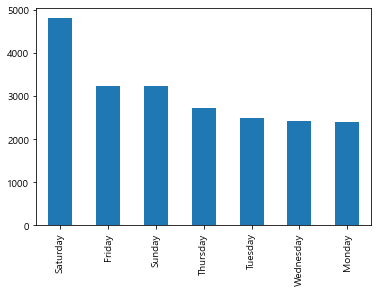

In [39]:
df['day'].value_counts().plot(kind='bar')

In [42]:
import seaborn as sns

<AxesSubplot:xlabel='day', ylabel='count'>

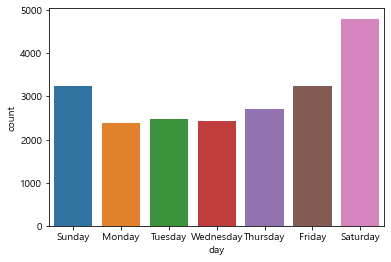

In [43]:
sns.countplot(x='day',data=df)

<AxesSubplot:xlabel='month', ylabel='count'>

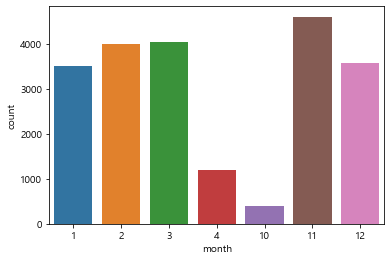

In [44]:
sns.countplot(x='month',data=df)

<AxesSubplot:xlabel='hour', ylabel='count'>

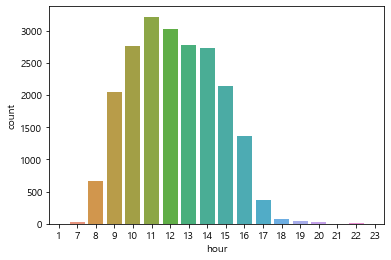

In [45]:
sns.countplot(x='hour',data=df)

In [47]:
df['Transaction']

0           1
1           2
2           2
3           3
4           3
         ... 
21288    9682
21289    9682
21290    9683
21291    9683
21292    9684
Name: Transaction, Length: 21293, dtype: int64

In [58]:
df_tmp=df[['Transaction','Item']]

In [59]:
df_tmp

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
...,...,...
21288,9682,Coffee
21289,9682,Tea
21290,9683,Coffee
21291,9683,Pastry


In [70]:
cnt=df['Transaction'].max()
cnt

9684

In [73]:
df_tmp_arr=[[i for i in range(cnt+1)]]
df_tmp_arr

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

In [71]:
for idx,i in enumerate(df['Item']):
    df_tmp_arr[df['Transaction'][idx]].append(i)
df_tmp_arr

[[],
 ['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin']]

In [77]:
#########################################################
###  데이터프레임 list로 변경
#########################################################

df_tmp=df[['Transaction','Item']]
df_tmp_arr=[[]for i in range(cnt+1)]


for idx,i in enumerate(df_tmp['Item']) :
    df_tmp_arr[df_tmp['Transaction'][idx]].append(i)

df_tmp_arr[:5]

[[],
 ['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin']]

In [78]:
#각 Transaction별 중복 값 제거
df_tmp_arr=[list(set(i)) for i in df_tmp_arr]
df_tmp_arr

[[],
 ['Bread'],
 ['Scandinavian'],
 ['Cookies', 'Hot chocolate', 'Jam'],
 ['Muffin'],
 ['Pastry', 'Bread', 'Coffee'],
 ['Pastry', 'Muffin', 'Medialuna'],
 ['Pastry', 'Tea', 'Coffee', 'Medialuna'],
 ['Pastry', 'Bread'],
 ['Muffin', 'Bread'],
 ['Scandinavian', 'Medialuna'],
 ['NONE', 'Bread', 'Medialuna'],
 ['Tartine', 'Jam', 'Pastry', 'Tea', 'Coffee'],
 ['Bread', 'Basket', 'Coffee'],
 ['Pastry', 'Bread', 'Medialuna'],
 ['Mineral water', 'NONE', 'Scandinavian'],
 ['Bread', 'Coffee', 'Medialuna'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Bread', 'Farm House'],
 ['Bread', 'Medialuna'],
 ['Bread', 'Coffee', 'Medialuna'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Bread', 'Coffee'],
 ['NONE', 'Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Muffin', 'Coffee'],
 ['Muffin', 'Scandinavian'],
 ['Bread', 'Tea'],
 ['NONE', 'Bread', 'Coffee'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['NONE', 'Tartine',

In [82]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te=TransactionEncoder()
te_arry=te.fit(df_tmp_arr).transform(df_tmp_arr)

In [90]:
df=pd.DataFrame(te_arry,columns=te.columns_)
df

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9683,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
frequent_itemsets=apriori(df,min_support=0.01,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.035519,(Alfajores)
1,0.015694,(Baguette)
2,0.319773,(Bread)
3,0.039133,(Brownie)
4,0.101497,(Cake)
...,...,...
58,0.048735,"(Tea, Coffee)"
59,0.023129,"(Coffee, Toast)"
60,0.017966,"(NONE, Tea)"
61,0.014042,"(Sandwich, Tea)"


In [106]:
#지지도가 0.05이상인 itemsets중 신뢰와 0.1이상인 itemsets
association_rules(frequent_itemsets,metric='support',min_threshold=0.005)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bread),(Alfajores),0.319773,0.035519,0.010119,0.031644,0.890894,-0.001239,0.995998
1,(Alfajores),(Bread),0.035519,0.319773,0.010119,0.284884,0.890894,-0.001239,0.951212
2,(Coffee),(Alfajores),0.467527,0.035519,0.019205,0.041078,1.156506,0.002599,1.005797
3,(Alfajores),(Coffee),0.035519,0.467527,0.019205,0.540698,1.156506,0.002599,1.159308
4,(Brownie),(Bread),0.039133,0.319773,0.010532,0.269129,0.841626,-0.001982,0.930708
...,...,...,...,...,...,...,...,...,...
63,"(Pastry, Coffee)",(Bread),0.046464,0.319773,0.010945,0.235556,0.736634,-0.003913,0.889832
64,"(Bread, Coffee)",(Pastry),0.087971,0.084151,0.010945,0.124413,1.478456,0.003542,1.045983
65,(Pastry),"(Bread, Coffee)",0.084151,0.087971,0.010945,0.130061,1.478456,0.003542,1.048383
66,(Bread),"(Pastry, Coffee)",0.319773,0.046464,0.010945,0.034227,0.736634,-0.003913,0.987329


In [83]:
te.columns_

['Adjustment',
 'Afternoon with the baker',
 'Alfajores',
 'Argentina Night',
 'Art Tray',
 'Bacon',
 'Baguette',
 'Bakewell',
 'Bare Popcorn',
 'Basket',
 'Bowl Nic Pitt',
 'Bread',
 'Bread Pudding',
 'Brioche and salami',
 'Brownie',
 'Cake',
 'Caramel bites',
 'Cherry me Dried fruit',
 'Chicken Stew',
 'Chicken sand',
 'Chimichurri Oil',
 'Chocolates',
 'Christmas common',
 'Coffee',
 'Coffee granules ',
 'Coke',
 'Cookies',
 'Crepes',
 'Crisps',
 'Drinking chocolate spoons ',
 'Duck egg',
 'Dulce de Leche',
 'Eggs',
 "Ella's Kitchen Pouches",
 'Empanadas',
 'Extra Salami or Feta',
 'Fairy Doors',
 'Farm House',
 'Focaccia',
 'Frittata',
 'Fudge',
 'Gift voucher',
 'Gingerbread syrup',
 'Granola',
 'Hack the stack',
 'Half slice Monster ',
 'Hearty & Seasonal',
 'Honey',
 'Hot chocolate',
 'Jam',
 'Jammie Dodgers',
 'Juice',
 'Keeping It Local',
 'Kids biscuit',
 'Lemon and coconut',
 'Medialuna',
 'Mighty Protein',
 'Mineral water',
 'Mortimer',
 'Muesli',
 'Muffin',
 'My-5 Fruit S

In [107]:
support_list=[0.005, 0.01, 0.05, 0.1]
con_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [110]:
total=[]
for i in support_list:
    frequent_itemsets=apriori(df,min_support=i,use_colnames=True)
    raw=[]
    for j in con_list:
        tmp=association_rules(frequent_itemsets,metric='confidence',min_threshold=j)
        raw.append(len(tmp))
    total.append(raw)
total

[[119, 62, 38, 27, 19, 4, 2, 1, 0],
 [42, 31, 18, 15, 12, 1, 1, 0, 0],
 [4, 2, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

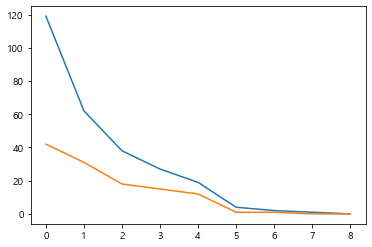

In [112]:
plt.plot(total[0])
plt.plot(total[1])

In [116]:
a=[1,2,3]
b=[
    ['a1','a2','a3'],
  ['b1','b2','b3']
  ]
for i , j in list(zip(a,b)):
    print(i)
    print(j)

1
['a1', 'a2', 'a3']
2
['b1', 'b2', 'b3']


0.1
[119, 62, 38, 27, 19, 4, 2, 1, 0]
0.2
[42, 31, 18, 15, 12, 1, 1, 0, 0]
0.3
[4, 2, 1, 1, 1, 0, 0, 0, 0]
0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0]


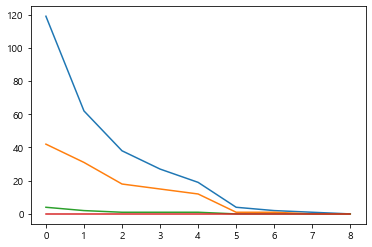

In [121]:
for i , j in zip(total,con_list):
    plt.plot(i)
    print(j)
    print(i)

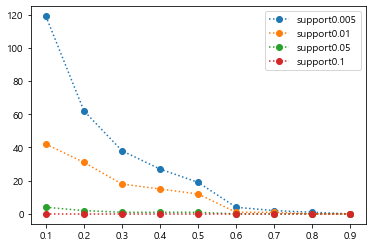

In [131]:
for i,j in zip(total, support_list):
    plt.plot(con_list, i, 'o:',label=f'support{j}')
    plt.legend()

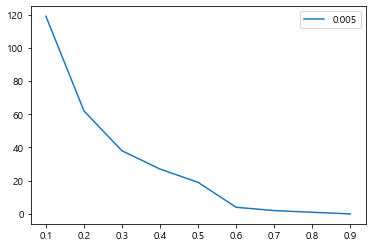

In [132]:
plt.plot(con_list,total[0],label='0.005')
plt.legend()

In [139]:
frequent_itemsets=apriori(df,min_support=0.01,use_colnames=True)
frequent_itemsets
rules=association_rules(frequent_itemsets,metric='confidence',
    min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bread),(Alfajores),0.319773,0.035519,0.010119,0.031644,0.890894,-0.001239,0.995998
1,(Alfajores),(Bread),0.035519,0.319773,0.010119,0.284884,0.890894,-0.001239,0.951212
2,(Coffee),(Alfajores),0.467527,0.035519,0.019205,0.041078,1.156506,0.002599,1.005797
3,(Alfajores),(Coffee),0.035519,0.467527,0.019205,0.540698,1.156506,0.002599,1.159308
4,(Brownie),(Bread),0.039133,0.319773,0.010532,0.269129,0.841626,-0.001982,0.930708
...,...,...,...,...,...,...,...,...,...
63,"(Pastry, Coffee)",(Bread),0.046464,0.319773,0.010945,0.235556,0.736634,-0.003913,0.889832
64,"(Bread, Coffee)",(Pastry),0.087971,0.084151,0.010945,0.124413,1.478456,0.003542,1.045983
65,(Pastry),"(Bread, Coffee)",0.084151,0.087971,0.010945,0.130061,1.478456,0.003542,1.048383
66,(Bread),"(Pastry, Coffee)",0.319773,0.046464,0.010945,0.034227,0.736634,-0.003913,0.987329


In [141]:
rules.sort_values('confidence',ascending=False)

#lift  :토스트 산 사람이 평균 커피를 1.5개 산다
#confidence:  토스트 산사람이 70% 커피를 산다

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
57,(Toast),(Coffee),0.032834,0.467527,0.023129,0.704403,1.506656,0.007778,1.801344
53,(Spanish Brunch),(Coffee),0.017759,0.467527,0.010635,0.598837,1.280861,0.002332,1.327324
39,(Medialuna),(Coffee),0.060403,0.467527,0.034383,0.569231,1.217535,0.006143,1.236098
44,(Pastry),(Coffee),0.084151,0.467527,0.046464,0.552147,1.180995,0.007121,1.188946
3,(Alfajores),(Coffee),0.035519,0.467527,0.019205,0.540698,1.156506,0.002599,1.159308
...,...,...,...,...,...,...,...,...,...
51,(Coffee),(Soup),0.467527,0.033660,0.015488,0.033127,0.984163,-0.000249,0.999449
5,(Bread),(Brownie),0.319773,0.039133,0.010532,0.032935,0.841626,-0.001982,0.993591
0,(Bread),(Alfajores),0.319773,0.035519,0.010119,0.031644,0.890894,-0.001239,0.995998
67,(Coffee),"(Pastry, Bread)",0.467527,0.028498,0.010945,0.023410,0.821467,-0.002379,0.994790


In [142]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(Hot chocolate),(Cake),0.056995,0.101497,0.011151,0.195652,1.927662,0.005366,1.117058
28,(Cake),(Hot chocolate),0.101497,0.056995,0.011151,0.109868,1.927662,0.005366,1.059398
59,(Tea),(NONE),0.139391,0.077749,0.017966,0.128889,1.657754,0.007128,1.058706
58,(NONE),(Tea),0.077749,0.139391,0.017966,0.231076,1.657754,0.007128,1.119238
30,(Cake),(Tea),0.101497,0.139391,0.023232,0.228891,1.642082,0.009084,1.116067
...,...,...,...,...,...,...,...,...,...
6,(Cake),(Bread),0.101497,0.319773,0.022819,0.224822,0.703068,-0.009637,0.877511
23,(Tea),(Bread),0.139391,0.319773,0.027465,0.197037,0.616178,-0.017108,0.847146
22,(Bread),(Tea),0.319773,0.139391,0.027465,0.085890,0.616178,-0.017108,0.941472
9,(Coffee),(Bread),0.467527,0.319773,0.087971,0.188163,0.588426,-0.061531,0.837886


In [144]:
#네트워크 차트
rules['length']=rules['antecedents'].apply(len)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(Bread),(Alfajores),0.319773,0.035519,0.010119,0.031644,0.890894,-0.001239,0.995998,1
1,(Alfajores),(Bread),0.035519,0.319773,0.010119,0.284884,0.890894,-0.001239,0.951212,1
2,(Coffee),(Alfajores),0.467527,0.035519,0.019205,0.041078,1.156506,0.002599,1.005797,1
3,(Alfajores),(Coffee),0.035519,0.467527,0.019205,0.540698,1.156506,0.002599,1.159308,1
4,(Brownie),(Bread),0.039133,0.319773,0.010532,0.269129,0.841626,-0.001982,0.930708,1
...,...,...,...,...,...,...,...,...,...,...
63,"(Pastry, Coffee)",(Bread),0.046464,0.319773,0.010945,0.235556,0.736634,-0.003913,0.889832,2
64,"(Bread, Coffee)",(Pastry),0.087971,0.084151,0.010945,0.124413,1.478456,0.003542,1.045983,2
65,(Pastry),"(Bread, Coffee)",0.084151,0.087971,0.010945,0.130061,1.478456,0.003542,1.048383,1
66,(Bread),"(Pastry, Coffee)",0.319773,0.046464,0.010945,0.034227,0.736634,-0.003913,0.987329,1


In [146]:
rules=rules[rules['lift']>1]

In [147]:
rules[rules['length']==2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
64,"(Bread, Coffee)",(Pastry),0.087971,0.084151,0.010945,0.124413,1.478456,0.003542,1.045983,2


In [152]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) 
tmp=frequent_itemsets[frequent_itemsets['length'] ==2] 
tmp

,support,itemsets,length
31,0.010119,"(Bread, Alfajores)",2
32,0.019205,"(Coffee, Alfajores)",2
33,0.010532,"(Brownie, Bread)",2
34,0.022819,"(Cake, Bread)",2
35,0.087971,"(Bread, Coffee)",2
36,0.014146,"(Cookies, Bread)",2
37,0.013113,"(Bread, Hot chocolate)",2
38,0.016520,"(Bread, Medialuna)",2
39,0.020237,"(NONE, Bread)",2
40,0.028498,"(Pastry, Bread)",2


In [155]:
ar=tmp['itemsets']

import networkx as nx
G=nx.Graph()
G.add_edges_from(ar)


import numpy as  np
pr=nx.pagerank(G)
pr

C:\Users\user\.conda\envs\han\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


{'Bread': 0.15867559974217835,
 'Alfajores': 0.03401795402080666,
 'Coffee': 0.2684748359987527,
 'Brownie': 0.03401795402080666,
 'Cake': 0.05965950792278901,
 'Cookies': 0.03401795402080666,
 'Hot chocolate': 0.04669568599129706,
 'Medialuna': 0.03401795402080666,
 'NONE': 0.046428929913718595,
 'Pastry': 0.03401795402080666,
 'Sandwich': 0.046428929913718595,
 'Tea': 0.07300575165494495,
 'Juice': 0.02175683145976124,
 'Muffin': 0.02175683145976124,
 'Scone': 0.02175683145976124,
 'Soup': 0.02175683145976124,
 'Spanish Brunch': 0.02175683145976124,
 'Toast': 0.02175683145976124}

In [157]:
nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))
print(len(nsize))


18


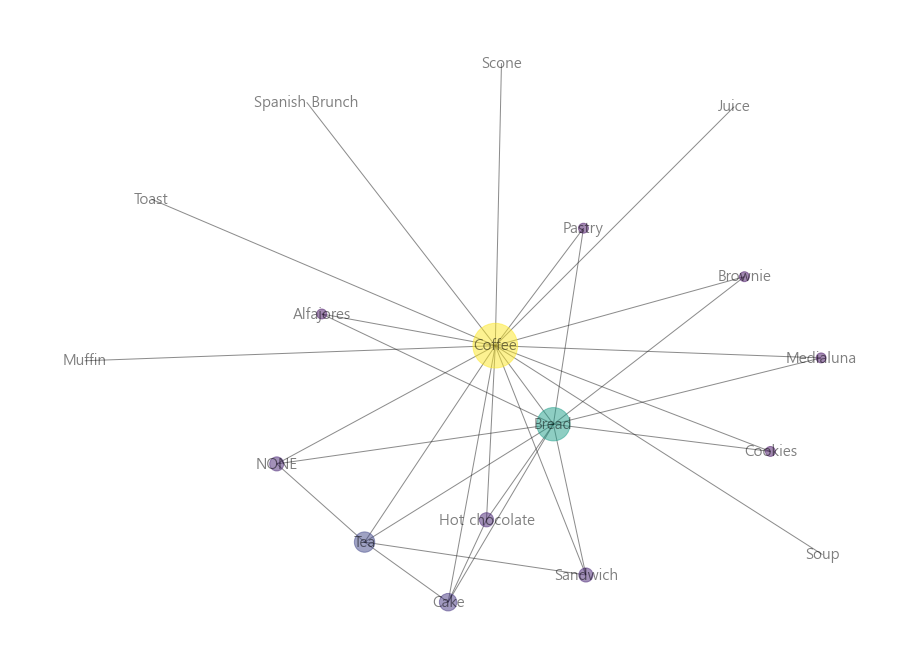

In [158]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(16,12)); plt.axis('off')

fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)